# VEHICLE DATASET

**GROUP 1:**
1. Arif Budiman
2. Roy Binsar Sinaga
3. Shaltsa Nadya

**ABOUT DATA**:<br>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. Specifically, in this section, it seems some factor are influential the pricing of cars in the American market, since those may be very different from the Chinese market. 

### 1. Problem Understanding and Definition

**Problem Statement**:<br>

1. Which variables are influential in predicting the selling price of a car
2. How nicely variable independents describe the selling price of a car

**Goals**: <br>
- To explain price prediction using linear regression in Machine Learning.

>- name: Name of the cars
>- year: Year of the car when it was bought
>- selling_price: Price at which the car is being sold
>- km_driven: Number of Kilometres the car is driven
>- fuel: Fuel type of car (petrol / diesel / CNG / LPG / electric)
>- seller_type: Tells if a Seller is Individual or a Dealer
>- transmission: Gear transmission of the car (Automatic/Manual)
>- Owner: Number of previous owners of the car.

### 2. IMPORTING DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('car_price.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3577 non-null   int64 
 1   name           3577 non-null   object
 2   year           3577 non-null   int64 
 3   selling_price  3577 non-null   int64 
 4   km_driven      3577 non-null   int64 
 5   fuel           3577 non-null   object
 6   seller_type    3577 non-null   object
 7   transmission   3577 non-null   object
 8   owner          3577 non-null   object
dtypes: int64(4), object(5)
memory usage: 251.6+ KB


In [4]:
df.sample(5)

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
62,75,Tata Indica Vista Quadrajet LS,2014,125000,166000,Diesel,Individual,Manual,Fourth & Above Owner
1397,1554,Maruti Alto LXi,2009,110000,50000,Petrol,Individual,Manual,Second Owner
525,540,Maruti Swift ZXI BSIV,2016,670000,7104,Petrol,Trustmark Dealer,Manual,First Owner
624,700,Renault Duster 85PS Diesel RxL,2015,650000,100000,Diesel,Individual,Manual,First Owner
2413,2852,Hyundai Elite i20 Petrol Asta Option,2018,700000,27000,Petrol,Individual,Manual,First Owner


### 2. EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
df= df.drop('Unnamed: 0', axis= 1)

In [6]:
# pengelompokan kolom berdasarkan jenisnya
df_num = [kolom for kolom in df.columns if df[kolom].dtypes != 'O']
df_cat = [kolom for kolom in df.columns if df[kolom].dtypes == 'O']

In [7]:
# ringkasan statistik data numerik
df[df_num].describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
# ringkasan statistik data category
df[df_cat].describe()

,name,fuel,seller_type,transmission,owner
count,3577,3577,3577,3577,3577
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,54,1800,2832,3265,2218


In [9]:
for i in df_cat:
    print(f'''Value count kolom {i}:''')
    print(df[i].value_counts())
    print()

Value count kolom name:
Maruti Swift Dzire VDI               54
Maruti Alto 800 LXI                  48
Maruti Alto LXi                      42
Maruti Alto LX                       30
Maruti Swift VDI BSIV                28
                                     ..
Toyota Innova 2.5 E 8 STR             1
Nissan Micra XL CVT                   1
Mahindra Scorpio VLX AT 2WD BSIII     1
Toyota Corolla AE                     1
Hyundai i20 Magna 1.4 CRDi            1
Name: name, Length: 1491, dtype: int64

Value count kolom fuel:
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64

Value count kolom seller_type:
Individual          2832
Dealer               712
Trustmark Dealer      33
Name: seller_type, dtype: int64

Value count kolom transmission:
Manual       3265
Automatic     312
Name: transmission, dtype: int64

Value count kolom owner:
First Owner             2218
Second Owner             978
Third Owner              289
Fourth &

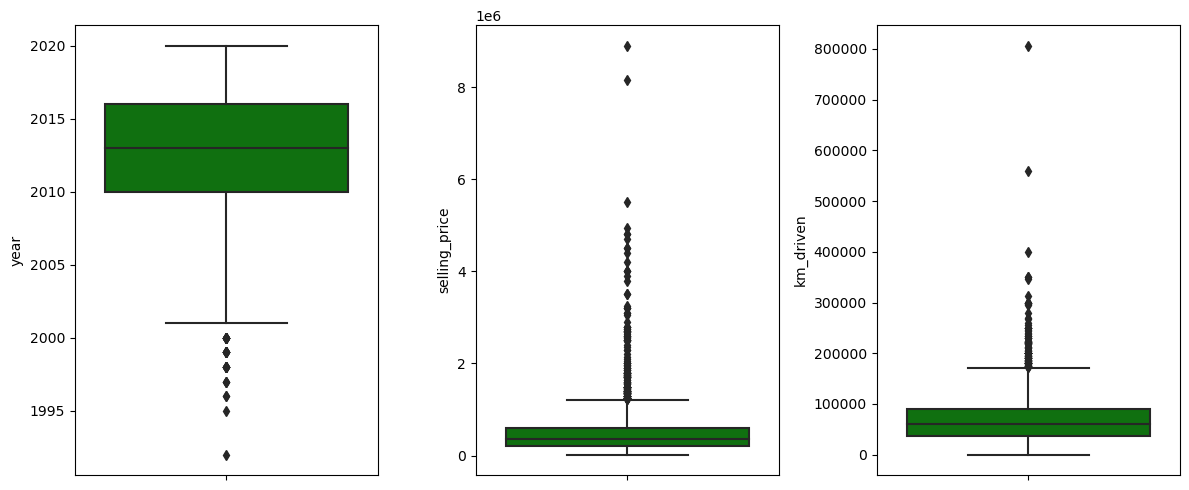

In [10]:
features = df_num
plt.figure(figsize=(12, 5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

- Year has outliers below 2000
- selling_price & km_driven has outliers based on different types of cars

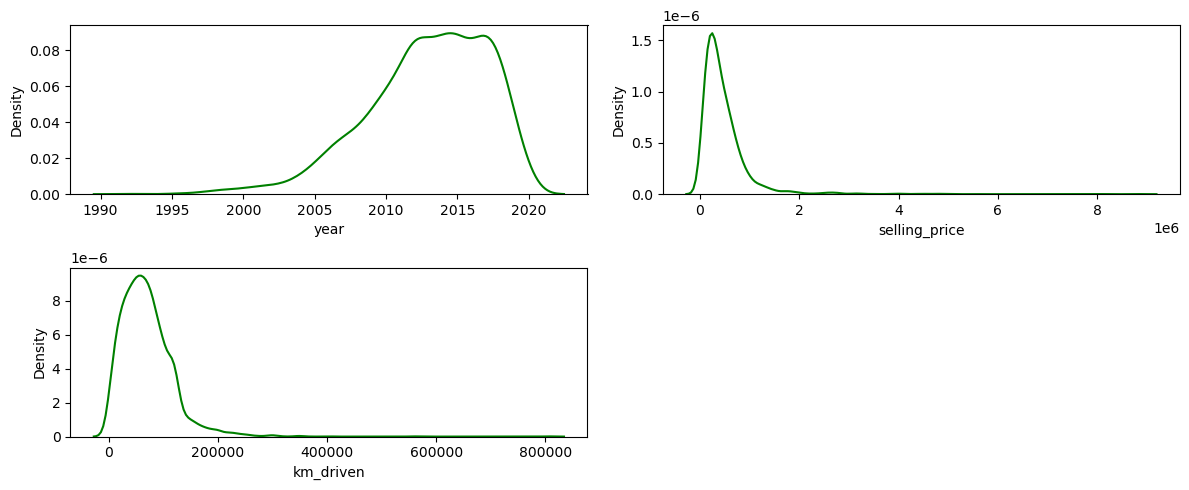

In [11]:
features = df_num
plt.figure(figsize=(12, 5))
for i in range(0, len(df_num)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

**Insight**:
1. High probability of year when car's year are between 2011-2018.
2. selling price is about to -+$4x10^5$
3. km_driven is about to $80.000$ Number of Kilometres the car is driven

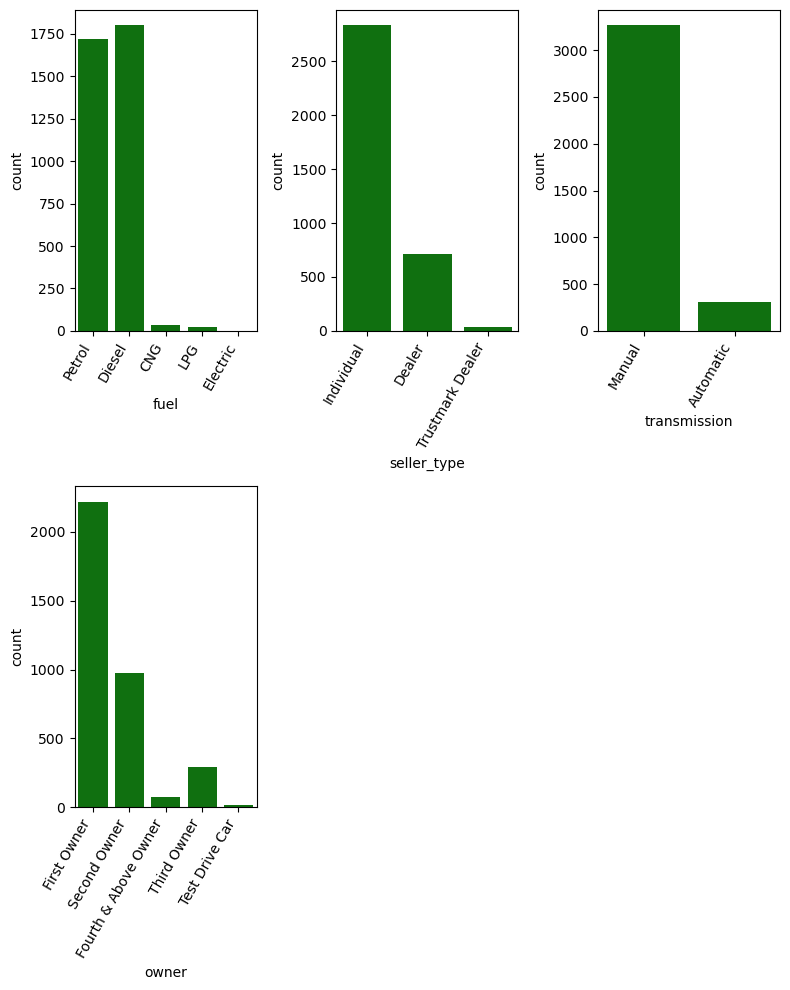

In [12]:
df_cat.remove('name') #run only once
plt.figure(figsize=(8, 10))
for i in range(0, len(df_cat)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df[df_cat[i]], color='green')
    plt.xticks(rotation=60, ha='right')
    plt.tight_layout()

Insight:
1. The most fuel was most likely to used is Diesel and petrol. Petrol and diesel are the first and second mostly used in America because petrol has the cheapest fuel price. While diesel is widely used because diesel produces the least amount of CO2 emissions compared to other fuels.
2. The most seller_type is Individual.Because the price of cars sold by individual parties tend to be cheaper, the taxes are lower than dealers. In addition, the bargaining process with individuals is more flexible than dealers.
3. The most Gear transmission of the car is Manual. Because, in terms of price and maintenance costs, manual cars are cheaper than automatic ones. 
4. The most of Number of previous owners of the car is First Owner. In the case of buying a used car, the buyer believes the problems and damage to the car will not be as bad as it may even be very minimal compared to the second and above owner.

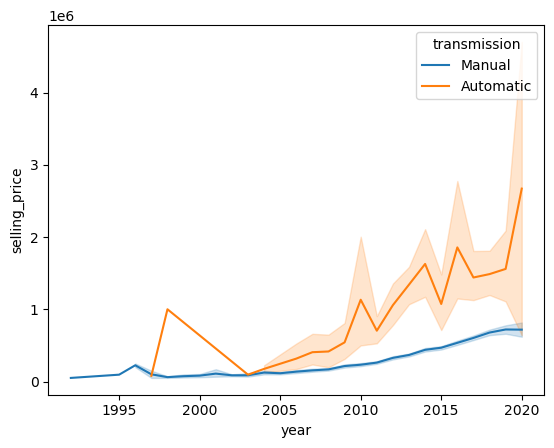

In [13]:
sns.lineplot(x='year',y='selling_price', hue= 'transmission', data=df);

- Automatic cars have high price than Manual car because the cost production of automatic car is higher.
- Every year, the automatic cars show the increasing trend.

In [14]:
df.groupby('transmission').agg({'selling_price':['mean','median']}).round(2)

selling_price          
                      mean    median
transmission                        
Automatic       1274955.11  855000.0
Manual           397365.75  325000.0

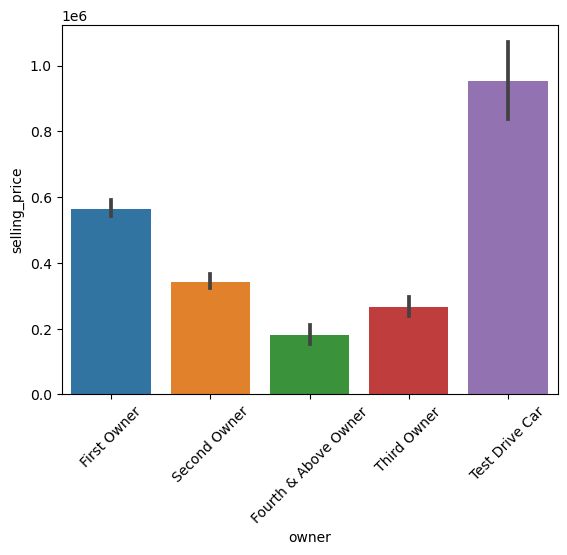

In [15]:
#plt.subplots()
sns.barplot(x='owner',y='selling_price', data=df);
plt.xticks(rotation= 45);

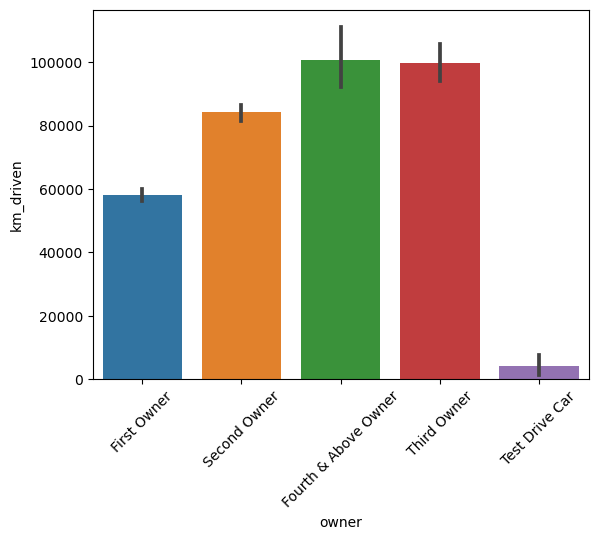

In [16]:
sns.barplot(x='owner',y='km_driven', data=df);
plt.xticks(rotation= 45);

- The Owner type which has the highest car price is Test Drive Car because Test drive car has km_driven less than other owner type.

In [17]:
df.groupby('owner').agg({'selling_price':['mean','median']}).round(2)

selling_price          
                              mean    median
owner                                       
First Owner              565385.45  450000.0
Fourth & Above Owner     181213.29  138000.0
Second Owner             341954.14  267000.0
Test Drive Car           954293.94  894999.0
Third Owner              266142.21  190000.0

In [18]:
pollution= {'Fuel': ['Electric', 'CNG','LPG','Diesel','Petrol'],
           'Quality':['no tailpipe, no carbon dioxide emissions','separate oxidation of CO and CH4(1mg of ammonia)','20% less CO2, 60% less CO, and 20% less NOx','2.68kg CO₂/litre with 120g CO₂/km ','2.31kg CO₂/litre with 200g CO₂/km'], 'Source':['https://keck.usc.edu/study-links-adoption-of-electric-vehicles-with-less-air-pollution-and-improved-health/','https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7429099/','https://www.researchgate.net/publication/286350428_Auto-LPG_Liquefied_Petroleum_Gas_and_its_Health_Outcomes_A_Review','https://theconversation.com/fact-check-are-diesel-cars-really-more-polluting-than-petrol-cars-76241','https://theconversation.com/fact-check-are-diesel-cars-really-more-polluting-than-petrol-cars-76241']}
pollution= pd.DataFrame(pollution)
pollution

,Fuel,Quality,Source
0,Electric,"no tailpipe, no carbon dioxide emissions",https://keck.usc.edu/study-links-adoption-of-e...
1,CNG,separate oxidation of CO and CH4(1mg of ammonia),https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
2,LPG,"20% less CO2, 60% less CO, and 20% less NOx",https://www.researchgate.net/publication/28635...
3,Diesel,2.68kg CO₂/litre with 120g CO₂/km,https://theconversation.com/fact-check-are-die...
4,Petrol,2.31kg CO₂/litre with 200g CO₂/km,https://theconversation.com/fact-check-are-die...


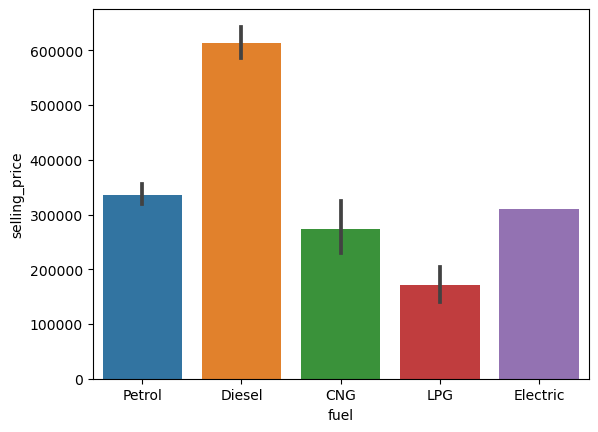

In [19]:
sns.barplot(x='fuel',y='selling_price', data=df);

- the highest car price has diesel as fuel because Diesel car has the massive torque at low RPM, and use less fuel. 

In [21]:
df.groupby('fuel').agg({'selling_price':['mean','median']}).round(2)

selling_price          
                  mean    median
fuel                            
CNG          273162.08  229999.0
Diesel       614001.07  475000.0
Electric     310000.00  310000.0
LPG          171818.14  180000.0
Petrol       335344.34  260000.0

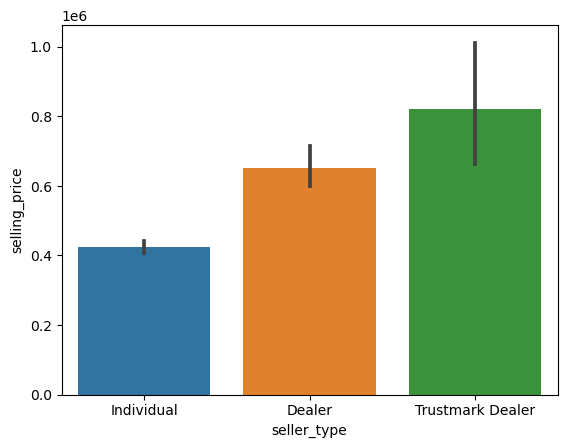

In [22]:
sns.barplot(x='seller_type',y='selling_price', data=df);

- The highest car price which has seller type Trustmark Dealer because buyer will be get facilties which can't get other seller type for instance: Vital Warranty, Test Drives Delivered 

In [23]:
df.groupby('seller_type').agg({'selling_price':['mean','median']}).round(2)

selling_price          
                          mean    median
seller_type                             
Dealer               652699.39  484999.0
Individual           424904.02  303500.0
Trustmark Dealer     822272.73  750000.0

### 3. DATA PRE-PROCESSING

In [24]:
mapping = {'Test Drive Car': 4,
           'First Owner': 3,
           'Second Owner': 2,
           'Third Owner': 1,
           'Fourth & Above Owner': 0}

df['owner'] = df['owner'].map(mapping)

In [25]:
mapping = {'Trustmark Dealer': 2,
           'Dealer': 1,
           'Individual': 0}

df['seller_type'] = df['seller_type'].map(mapping)

In [26]:
mapping = {'Diesel': 4,
           'Petrol': 3,
           'Electric': 2,
           'CNG': 1,
           'LPG': 0}

df['fuel'] = df['fuel'].map(mapping)

In [27]:
#tm = pd.get_dummies(df['transmission'], prefix='tm')
mapping={'Automatic': 1, 
         'Manual': 0}

df['transmission'] = df['transmission'].map(mapping)

In [130]:
#fu = pd.get_dummies(df['fuel'], prefix='fu')

In [131]:
#df = df.join(fu)

In [28]:
df.sample()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2402,Nissan Kicks XL D BSIV,2019,1100000,4000,4,0,0,3


<AxesSubplot:>

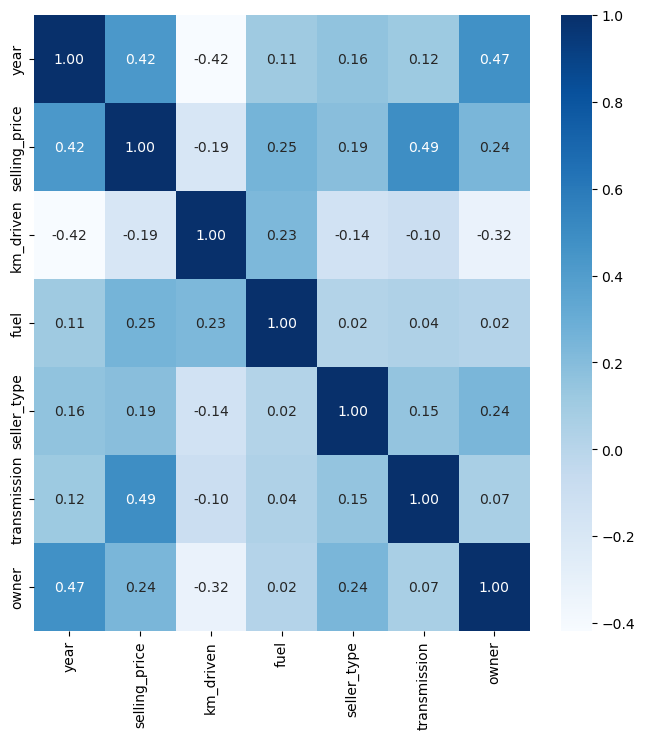

In [29]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Insight:
- The highest correlation of dependent variable "selling_price" with "transmission" independent has value about to 0.49 and "year", 0.42 which this correlation is relatively weak.
- The highest correlation between independent variables is found in variables "year" and "owner" about to 0.47, this is a weak negative correlation.

In [30]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

### 4. SPLIT DATA

In [31]:
X = df[['year','km_driven','seller_type','owner',
        'transmission','fuel']]
y = df['selling_price']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [34]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#R2 score
# for rmse mse(squared=False)



In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(X_test)

In [38]:
print('R2 score:',(r2_score(y_test,y_pred)))
print('mape score:',mape(y_test,y_pred))
print('mae score:',mae(y_test,y_pred))
print('rmse score:',mse(y_test,y_pred,squared=False))
print('mse score:',mse(y_test,y_pred))

R2 score: 0.4648346918383387
mape score: 0.6585583493496611
mae score: 206162.2073784992
rmse score: 341710.2775044292
mse score: 116765913752.15404


- R2: all independent variables in the model simultaneously affect 46.48% of target. it means there are 53.52% unknown variables.
(small amount of variance explained)
- MAPE : possible to error or deviation of 65.85% from actual value.
- MAE : The average deviation is 206162.207 from actual value
- RMSE : The root average deviation is 341710.277 from actual value. (isn't the better performing the model is)
- MSE: The biggest deviation from model is $116.7 X10^9$ from actual value

In [39]:
x1 = sm.add_constant(X_train)
results = sm.OLS(y_train,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     305.7
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          7.49e-299
Time:                        20:32:10   Log-Likelihood:                -38418.
No. Observations:                2682   AIC:                         7.685e+04
Df Residuals:                    2675   BIC:                         7.689e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.433e+07    4.5e+06    -16.514      0.000   -8.32e+07   -6.55e+07
year           3.68e+04   2244.322     16.399      0.000    3.24e+04    4.12e+04
km_driven       -0.5248      0.203     -2.581      0.010      -0.924      -0.126
seller_type     6.9e+04   1.89e+04      3.655      0.000     3.2e+04    1.06e+05
owner         2.055e+04   1.24e+04      1.661      0.097   -3703.303    4.48e+04
transmission  7.936e+05   2.82e+04     28.113      0.000    7.38e+05    8.49e+05
fuel            1.8e+05   1.35e+04     13.307      0.000    1.53e+05    2.07e+05
==============================================================================
Omnibus:                     3319.523   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           898328.228
Skew:                           6.337   Prob(JB):                         0.00
Kurtosis:                      91.759   Cond. No.                     4.79e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The regression line used here is,
> X1= year
> X2= km_driven
> X3= seller_type
> X4= owner
> X5= transmission
> X6= fuel
- $y = a + bX1+ cX2+ dX3 + eX4 + fX5 + gX6 + hX7$
- $y = -4.929x10^7 + 3.68x10^4 X1 + -0.5248 X2 + 6.9x10^4 X3+ 2.055 x10^4 X4+ 7.936X10^5 X5 + 1.28X10^5 X6$

- R-Squared= 0.407.../all independent variables in the model simultaneously affect 40.7% of target. it means there are 59.3% unknown variables. 
- Prob F-statistic (7.49e-299-> close to zero), this implies that overall the regressions is meaningful.
- Prob (Omnimbus)is 0.00, which implies that the OLS assumption is not satisfied. Due to, the coefficients estimated out of(far of the 1)
- a positive coef (year, seller_type, owner, fuel)indicates that value of independent variable increases, also mean. the inverse is True for Negative Coef(km_driven)
- Variable is significant in regression (having p-values less than alpha): p>|t| is less than the significance value of 0.05. that means there is a strong evidence that all of variable independents exclude **owner** are significant variables. But based on these coef, i would like to choose **transmission** as most important independent variable in regression model

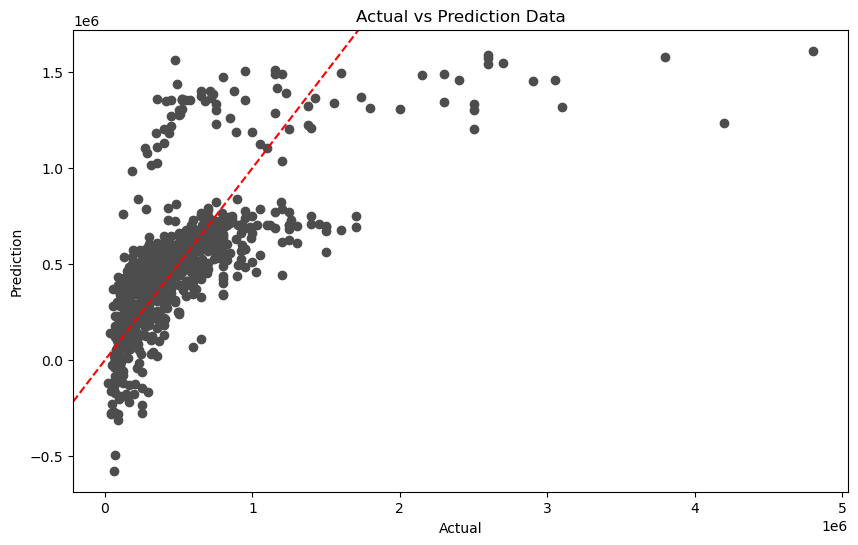

In [58]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim() 
        low_y, high_y = axes.get_ylim()   
        low = max(low_x, low_y) 
        high = min(high_x, high_y) 
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes
f, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_test, y_pred, c=".3")
add_identity(ax, color='r', ls='--')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction Data')
plt.show()

- **The graph shows that there is a weak correlation leading to positive between actual data and predictions where there is data that is predicted correctly but most of the data is predicted incorrectly.** 

### 5. CONCLUSION

**Summary**:<br>
- Variable significant based on P-Value is year, seller_type, fuel, km_driven, transmission
- By R2 value of OLS shows all independent variables in the model simultaneously affect 40.7% of target. which is data testing model will be incorrectly predicted.
- The most significant independent variable is transmission. it's why related with corr value about to 0.49.
- Transmission variable which mostly used is automatic. Automatic car is higher selling price than Manual since the machine production of Automatic more complex therefore the cost production car is basicly more expensive.

**Suggestion**:<br>
- By improving model regression needs the feature engineering, equalize number, other methods such as normalization or scalling.
